# NN with backpropagation


Loss after iteration 0 : 0.2914445238699871
Final predictions on all training data:
[[8.26922156e-01 5.44918155e-03 7.86870814e-02 1.36914794e-03
  9.62938454e-02 1.03274853e-01 1.98772523e-04 4.83317625e-03]
 [2.99481972e-03 8.83255237e-01 3.71585009e-02 7.27829044e-04
  3.52755142e-02 1.97074251e-06 1.08188790e-01 8.79749403e-04]
 [9.70014736e-02 9.40873454e-02 8.88132914e-01 2.83551771e-05
  2.53273312e-04 7.53579240e-04 8.46972299e-03 1.11990447e-01]
 [4.72955486e-04 4.64950409e-04 1.53340917e-06 8.87723687e-01
  5.16687792e-02 5.26607054e-02 9.86090338e-02 3.95689475e-03]
 [8.25711050e-02 9.23662068e-02 1.58885674e-04 8.43156471e-02
  8.99300475e-01 1.17753165e-03 3.24983238e-03 6.35758070e-05]
 [8.69168298e-02 3.16739612e-05 1.19787315e-03 7.79801500e-02
  2.12736611e-03 8.79241229e-01 2.34664630e-03 1.27083877e-01]
 [1.21980527e-05 2.92932254e-02 4.20021766e-04 5.53932772e-02
  1.36242687e-04 9.60399582e-05 8.34810554e-01 7.25185948e-02]
 [1.56089878e-03 4.32675311e-04 8.0382592

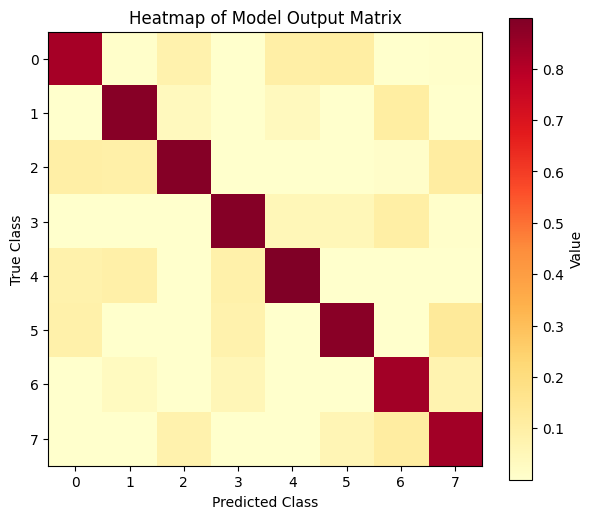

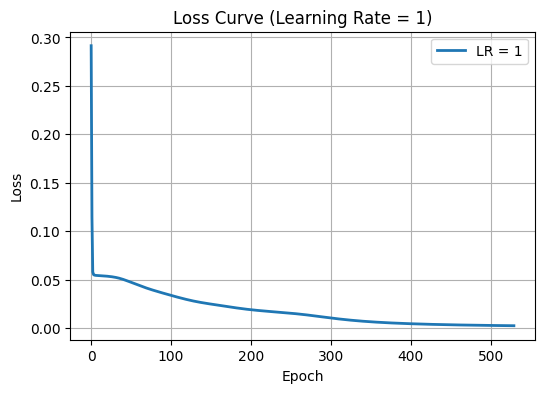

Loss after iteration 0 : 0.29004230816369
Final predictions on all training data:
[[8.78579875e-01 8.06563825e-02 3.33817286e-03 9.89367933e-02
  2.38153602e-05 8.09673076e-04 6.63058776e-02 4.12563582e-04]
 [6.58845887e-02 8.81050231e-01 5.60673501e-06 2.41273924e-03
  1.76189112e-04 8.18245269e-02 7.68244223e-04 6.23436869e-02]
 [2.31204174e-03 3.64740023e-05 8.35529896e-01 8.92106637e-02
  1.39976454e-01 6.67734091e-03 4.22661990e-02 4.30961648e-04]
 [6.39374194e-02 1.67523179e-03 1.14865161e-01 8.51798328e-01
  1.08912942e-03 7.15996431e-02 6.00246851e-04 1.55636190e-05]
 [1.61229495e-05 3.68532082e-04 8.70122810e-02 9.14667550e-04
  8.30945538e-01 1.10005646e-01 5.42545633e-03 8.96699948e-02]
 [2.69189834e-04 3.68962559e-02 8.19108159e-04 7.79804491e-02
  2.84899211e-02 8.56792844e-01 1.33749120e-05 3.19690095e-03]
 [8.08468233e-02 2.45869241e-03 6.90209699e-02 3.86002989e-04
  9.22799896e-03 7.05598518e-05 8.83642164e-01 5.34112205e-02]
 [5.52126144e-04 9.50315023e-02 2.52228136e

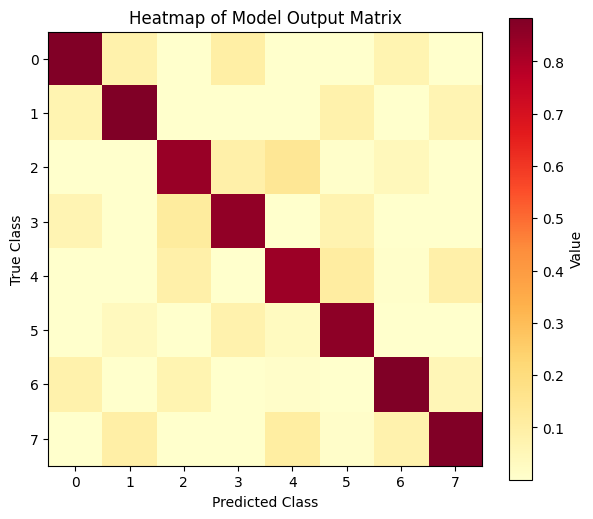

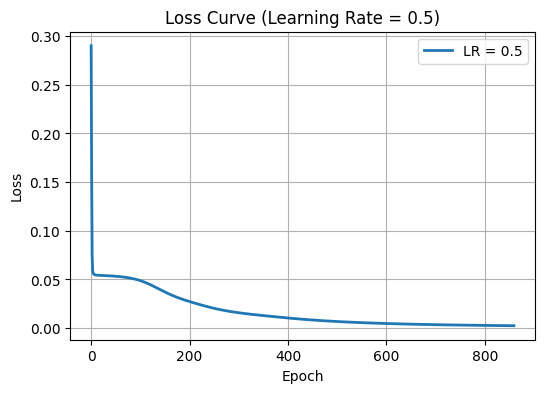

Loss after iteration 0 : 0.275702529848447
Loss after iteration 2000 : 0.016557410074889346
Loss after iteration 4000 : 0.006451744124048393
Final predictions on all training data:
[[8.55803531e-01 1.10580873e-02 1.03939303e-04 1.42015956e-02
  1.25074338e-01 1.40458623e-04 5.96160963e-03 1.04739126e-01]
 [4.27811181e-02 8.92698717e-01 2.59808763e-04 8.34452631e-02
  1.06594843e-01 5.51346250e-02 5.08307761e-05 5.67931922e-05]
 [3.43562695e-05 1.57975036e-04 8.93107007e-01 5.54748571e-02
  3.85589634e-04 7.61475280e-02 1.94375095e-02 4.71000938e-02]
 [1.27690074e-02 8.00153084e-02 3.41268653e-02 8.95889559e-01
  3.10651895e-04 1.57158969e-03 9.54027449e-06 1.93168649e-02]
 [1.11364816e-01 4.47794137e-02 1.63966758e-04 2.32007052e-04
  7.55393956e-01 4.20455776e-02 1.06484735e-01 7.56183088e-04]
 [4.64220673e-05 5.09644424e-02 7.71137408e-02 1.23981248e-03
  9.70559724e-02 8.91072018e-01 3.05299466e-02 3.85834067e-05]
 [5.03372417e-03 4.39715137e-05 4.08957008e-02 1.34915737e-04
  1.214

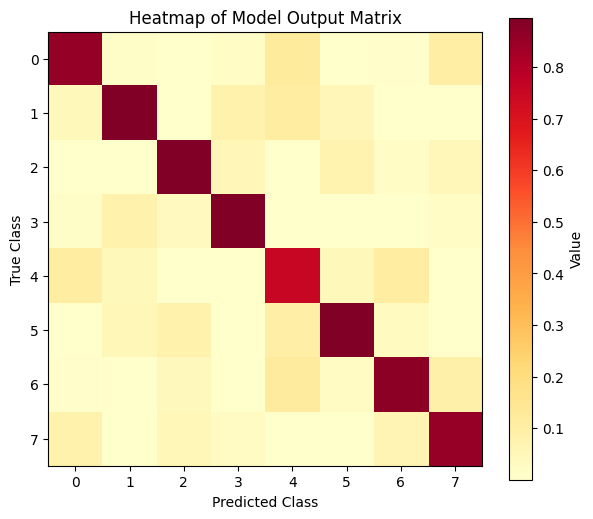

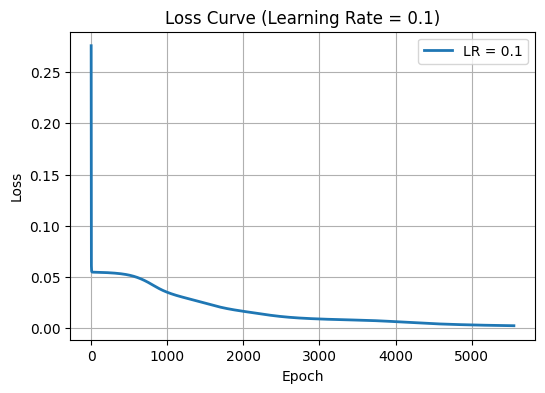

Loss after iteration 0 : 0.29590171957386513
Loss after iteration 2000 : 0.03418728469528044
Loss after iteration 4000 : 0.01327666145702395
Loss after iteration 6000 : 0.008898719293274102
Loss after iteration 8000 : 0.006619741553134861
Loss after iteration 10000 : 0.002992972838732064
Final predictions on all training data:
[[8.69989199e-01 3.42547288e-02 4.53405561e-06 6.99361682e-04
  2.55149625e-03 9.20274291e-02 3.53809035e-03 3.08739570e-02]
 [5.66395383e-02 9.05556495e-01 6.02422407e-04 5.35420027e-02
  4.03513729e-02 2.44169995e-04 1.26257631e-04 5.40093239e-05]
 [4.71280998e-06 1.44132779e-03 9.02781592e-01 5.82659648e-02
  3.29450651e-02 2.06488586e-04 1.53414264e-01 1.64149106e-03]
 [1.49394674e-04 6.15599507e-02 5.26943693e-02 9.04602249e-01
  1.01134895e-04 3.83073660e-02 2.06023882e-02 1.06027978e-05]
 [5.19026965e-03 6.17609901e-02 3.44655754e-02 1.39725373e-04
  8.92414601e-01 4.29735189e-06 2.14599337e-03 3.19174420e-02]
 [6.52045900e-02 1.05500519e-03 1.26452640e-04

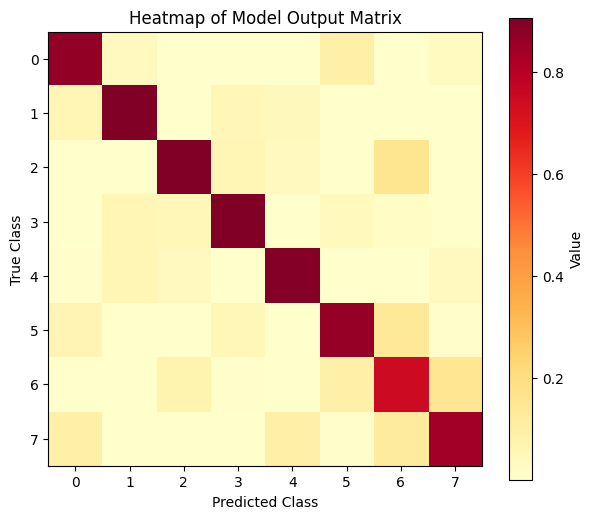

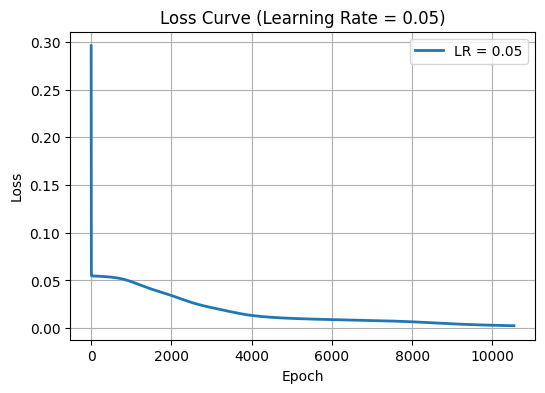

Loss after iteration 0 : 0.30955430374218146
Loss after iteration 2000 : 0.05392949237929298
Loss after iteration 4000 : 0.05232887144755065
Loss after iteration 6000 : 0.048539911988223425
Loss after iteration 8000 : 0.04259095223259002
Loss after iteration 10000 : 0.03595840302352406
Loss after iteration 12000 : 0.030640202746867014
Loss after iteration 14000 : 0.02672240420886526
Loss after iteration 16000 : 0.023983466325300073
Loss after iteration 18000 : 0.021621590989966258
Loss after iteration 20000 : 0.018900436649714435
Loss after iteration 22000 : 0.01619813393572252
Loss after iteration 24000 : 0.013947836982984314
Loss after iteration 26000 : 0.012319569770703104
Loss after iteration 28000 : 0.011207805848229715
Loss after iteration 30000 : 0.010424733433959157
Loss after iteration 32000 : 0.009845994413141535
Loss after iteration 34000 : 0.009397472522888589
Loss after iteration 36000 : 0.009032941418253516
Loss after iteration 38000 : 0.00872118333520499
Loss after itera

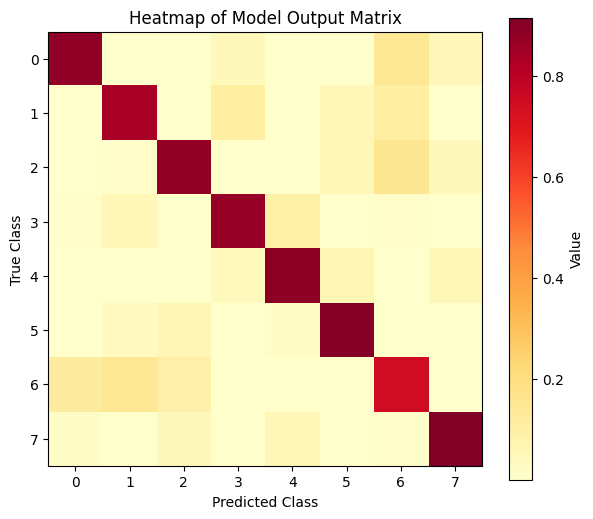

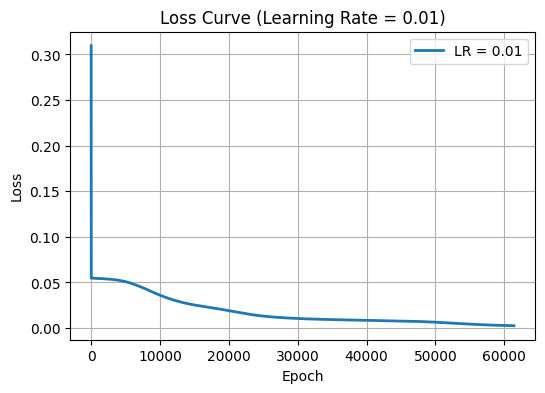

Loss after iteration 0 : 0.2855926174187382
Loss after iteration 2000 : 0.028963113661361575
Loss after iteration 4000 : 0.011011595253994925
Loss after iteration 6000 : 0.0059573032141529755
Loss after iteration 8000 : 0.003065083379893812
Final predictions on all training data:
[[8.89160642e-01 9.35522942e-05 1.67581600e-05 5.30106460e-02
  4.92567630e-02 6.29996003e-02 7.18777992e-03 1.74036889e-03]
 [1.33435693e-04 7.76752502e-01 1.23005420e-01 1.13370374e-03
  2.55062002e-04 3.30894651e-02 1.03405388e-01 2.97454844e-02]
 [1.86077238e-04 1.15135590e-01 8.51206223e-01 7.66532540e-02
  7.69154272e-02 8.26403221e-05 2.74247209e-03 1.71806415e-02]
 [1.70053661e-02 3.24415193e-03 6.78422405e-02 8.39057607e-01
  3.95529347e-02 2.06296124e-04 9.71519218e-02 1.28787334e-04]
 [7.89754828e-02 3.21939333e-04 3.62842811e-02 5.75371333e-02
  8.83856737e-01 1.54489732e-04 2.20960132e-05 6.34600757e-02]
 [7.51316406e-02 7.70977201e-02 2.57736003e-05 6.12858593e-05
  1.42589538e-04 9.06334708e-01 

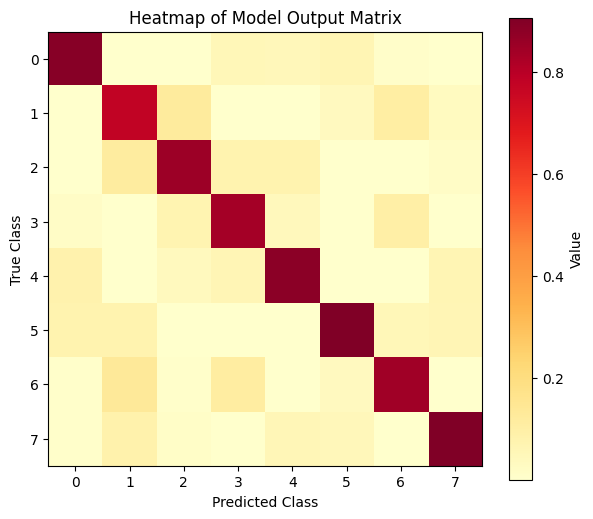

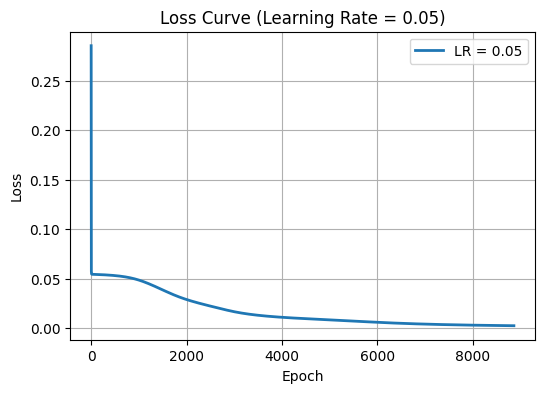

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],
[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
x_array = np.array(x)
X_train = x_array[0:6]
#print(X_train)
X_test = x_array[6:8]
Y = x_array
#print(Y)

# We need to have 8 inputs (each number in a row of the matrix),a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)
# class NeuralNetwork:
#     def __init__(self):
#         self.W1 = np.random.rand(n_input, n_hidden)
#         self.W2 = np.random.rand(n_hidden, n_output)
#         self.b1 = np.random.rand(n_hidden)
#         self.b2 = np.random.rand(n_output)
#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
#     def first_layer(self, X):
#         return self.sigmoid(np.dot(X, self.W1) + self.b1)
#     def second_layer(self, hidden_output):
#         return self.sigmoid(np.dot(hidden_output, self.W2) + self.b2)
#     def forward(self, x_array, Y):
#         hidden_output = first_layer(x_array)
#         #print("Hidden output after iteration", i, ":", hidden_output)
#         output = second_layer(hidden_output)
#         #print("Output after iteration", i, ":", output)
#         # Compute loss (Mean Squared Error)
#         return self.output
#     def backward(self, X, Y, lr)


n_hidden = 3
n_output = 8
# Weights
np.random.seed(42)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def first_layer(X, W1, b1):
    return sigmoid(np.dot(X, W1) + b1)
#print(first_layer(X_train))

def second_layer(hidden_output, W2, b2):
    return sigmoid(np.dot(hidden_output, W2) + b2)

lr_list = [1, 0.5, 0.1, 0.05, 0.01, 0.05]
for lr in lr_list: 
    loss_list= []

    W1 = np.random.rand(n_input, n_hidden) # 8 x 3 Weights for input to hidden
    #print(W1)
    W2 = np.random.rand(n_hidden, n_output) # 3 x 8 Weights for hidden to output
    #print(W2)
    # Biases
    b1 = np.random.rand(n_hidden) # Bias for hidden layer (3)
    b2 = np.random.rand(n_output) # Bias for output layer (8)



    for i in range(100000): # Training loop
        # Forward pass
        batches = np.array_split(x_array, 1)
        Y_batches = np.array_split(Y[0:8], 1)
        for X_batch, Y_batch in zip(batches, Y_batches):
            hidden_output = first_layer(X_batch, W1, b1)
            #print("Hidden output after iteration", i, ":", hidden_output)
            output = second_layer(hidden_output, W2, b2)
            #print("Output after iteration", i, ":", output)
            # Compute loss (Mean Squared Error)
            loss_value = np.mean(1/2 *(Y_batch - output) ** 2)
            loss_list.append(loss_value)
            # Backpropagation
            output_error = Y_batch - output # This is the result of doing the derivative of the loss function; 
            # The minus sign of gradient descent has already been taken into account here
            output_delta = output_error * (output * (1 - output)) # loss derivative * sigmoid derivative (descent direction)
            #print("Output delta after iteration", i, ":", output_delta) # 8 x 2 matrix
            
            hidden_error = output_delta.dot(W2.T) # 3 x 2 matrix
            #print("Hidden error after iteration", i, ":", hidden_error)
            hidden_delta = hidden_error * (hidden_output * (1 - hidden_output))
            # Update weights and biases
            W2 += lr*hidden_output.T.dot(output_delta)
            b2 += np.sum(output_delta, axis=0)
            W1 += lr* X_batch.T.dot(hidden_delta)
            b1 += np.sum(hidden_delta, axis=0)
            
            if i % 2000 == 0:
                print("Loss after iteration", i, ":", np.mean(loss_value))
                #print ("Batch:", X_batch)
        if np.mean(loss_value) < 0.0025:
            final_output = second_layer(first_layer(x_array, W1, b1), W2, b2)
            print("Final predictions on all training data:")
            print(final_output)
            # print("Predictions on test data:")
            # print(second_layer(first_layer(X_test)))


            plt.figure(figsize=(7, 6))
            plt.imshow(final_output, cmap='YlOrRd', interpolation='nearest')  # red-yellow colormap
            plt.colorbar(label='Value')
            plt.title('Heatmap of Model Output Matrix')
            plt.xlabel('Predicted Class')
            plt.ylabel('True Class')
            plt.show()
            
            plt.figure(figsize=(6, 4))
            plt.plot(loss_list, label=f"LR = {lr}", linewidth=2)
            plt.title(f"Loss Curve (Learning Rate = {lr})")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid(True)
            plt.show()
            break

    

def loss(Y, second_layer_output_0):
    return (1/2*(Y - second_layer_output_0) ** 2)
#loss_value = loss(Y[0:6], second_layer_output_0)
#print("Loss:", loss_value[0])